# Task 2 
# Prediction Using Unsupervised ML 
## from the given datset "Iris" predict the optimum number of clusters and represent it visually


## import libraries 

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import style
import seaborn as sns 
from sklearn import datasets
from sklearn.cluster import KMeans 
%matplotlib inline

In [4]:
#import and read the data and show first 5 rows

data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Show the details of this data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### As we can see in this data, it's have no null or missing values , and that so great 

In [6]:
# Show the details of describtion for this data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
# Showing the unique values for each features of this data
data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

##### Every features have thire own unique values with them as per the above unique()

In [10]:
# Showing the columns names of this data
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
# Showing the unique vlaues from the "SepalWidthCm" column
data['SepalWidthCm'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

#### Showing the unique vlaues from the "SepalWidthCm" column

In [12]:
# Showing the unique vlaues from the "PetalWidthCm" column
data['PetalWidthCm'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

#### Showing the unique vlaues from the "PetalWidthCm" column

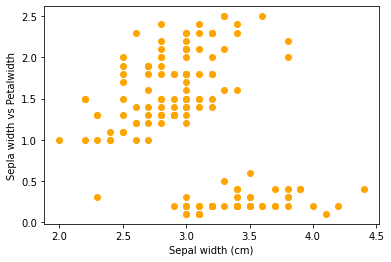

In [15]:
# visualising the "SepalWidthCm" And "PetalWidthCm" using scattar plot.
plt.scatter(data['SepalWidthCm'],data['PetalWidthCm'], c='Orange')
plt.xlabel('Sepal width (cm)')
plt.ylabel('Petal width (cm)')
plt.ylabel('Sepla width vs Petalwidth')
plt.show()

In [16]:
# Showing the unique vlaues from the "SepalLengthCm" column
data['SepalLengthCm'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [17]:
# Showing the unique vlaues from the "PetalLengthCm" column
data['PetalLengthCm'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

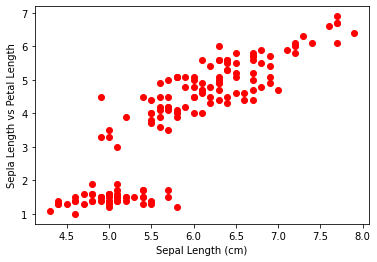

In [18]:
# visualising the "SepalLengthCm" And "PetalLengthCm" using scattar plot.
plt.scatter(data['SepalLengthCm'],data['PetalLengthCm'], c='red')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.ylabel('Sepla Length vs Petal Length')
plt.show()

<AxesSubplot:>

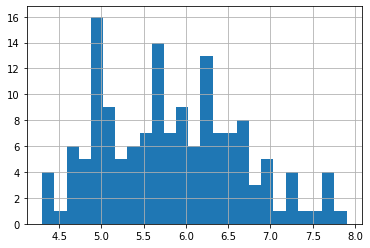

In [19]:
# Showing the unique vlaues from the "SepalLengthCm" column using histogram
data['SepalLengthCm'].hist(bins=25)

<AxesSubplot:>

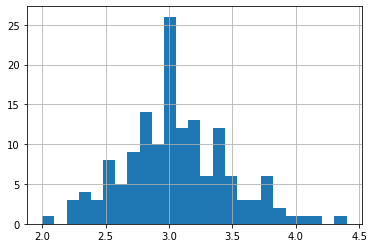

In [20]:
# Showing the unique vlaues from the "SepalWidthCm" column using histogram
data['SepalWidthCm'].hist(bins=25)

<AxesSubplot:>

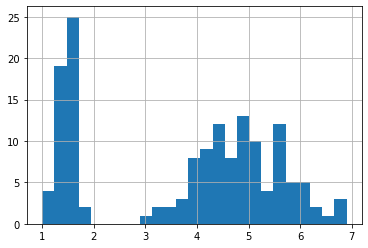

In [21]:
# Showing the unique vlaues from the "PetalLengthCm" column using histogram
data['PetalLengthCm'].hist(bins=25)

<AxesSubplot:>

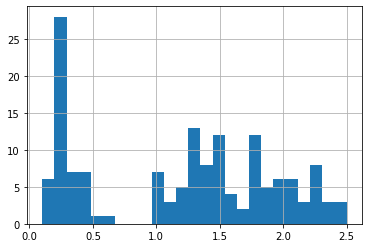

In [22]:
# Showing the unique vlaues from the "PetalWidthCm" column using histogram
data['PetalWidthCm'].hist(bins=25)

In [24]:
# Creating the X features 
x = data.iloc[:, [0, 1, 2, 3]].values
x

array([[  1. ,   5.1,   3.5,   1.4],
       [  2. ,   4.9,   3. ,   1.4],
       [  3. ,   4.7,   3.2,   1.3],
       [  4. ,   4.6,   3.1,   1.5],
       [  5. ,   5. ,   3.6,   1.4],
       [  6. ,   5.4,   3.9,   1.7],
       [  7. ,   4.6,   3.4,   1.4],
       [  8. ,   5. ,   3.4,   1.5],
       [  9. ,   4.4,   2.9,   1.4],
       [ 10. ,   4.9,   3.1,   1.5],
       [ 11. ,   5.4,   3.7,   1.5],
       [ 12. ,   4.8,   3.4,   1.6],
       [ 13. ,   4.8,   3. ,   1.4],
       [ 14. ,   4.3,   3. ,   1.1],
       [ 15. ,   5.8,   4. ,   1.2],
       [ 16. ,   5.7,   4.4,   1.5],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 18. ,   5.1,   3.5,   1.4],
       [ 19. ,   5.7,   3.8,   1.7],
       [ 20. ,   5.1,   3.8,   1.5],
       [ 21. ,   5.4,   3.4,   1.7],
       [ 22. ,   5.1,   3.7,   1.5],
       [ 23. ,   4.6,   3.6,   1. ],
       [ 24. ,   5.1,   3.3,   1.7],
       [ 25. ,   4.8,   3.4,   1.9],
       [ 26. ,   5. ,   3. ,   1.6],
       [ 27. ,   5. ,   3.4,   1.6],
 

In [25]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

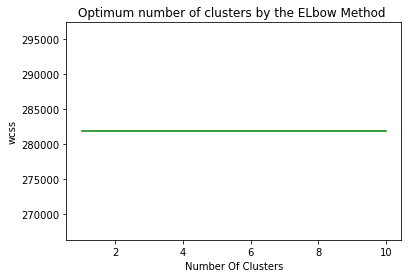

In [30]:
#displaying And managing the ELbows For Creating Clusters
wcss=[]
for i in range (1,11):
    kmeans = KMeans(n_clusters=1, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,c='green')
plt.xlabel('Number Of Clusters')
plt.ylabel('wcss')
plt.title('Optimum number of clusters by the ELbow Method ')
plt.show()

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


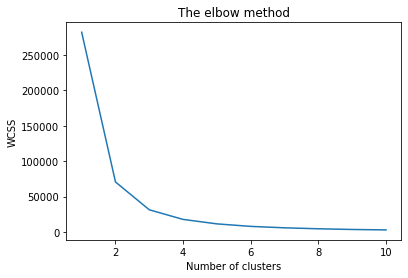

In [32]:
x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [33]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

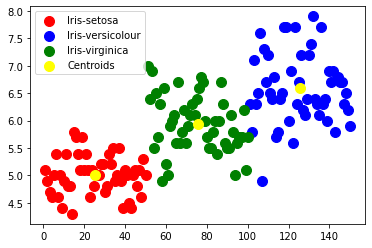

In [34]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()